#Siguiendo los Centros de Masa: un algorítmo que une los puntos de promedios vectoriales para cuadros consecutivos.

Pensemos si el "breadth first search" nos da los mejores resultados para encontrar las trayectorias disjuntas de los Centros de Masa. Ejemplo 01, chequemos si hay puntos consecutivos entre estos dos.

In [1]:
function dist2D(x::Array,y::Array)
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end

dist2D (generic function with 1 method)

In [2]:
using PyPlot

In [3]:
MegaArrayPositivo=Array[] 
#=El borrico que toco la flauta por casualidad:
Esto hace un Arrey de Arrays vacio de dimensión uno...
=#

0-element Array{Array{T,N},1}

In [4]:
MegaArrayNegativo=Array[] 
#=El borrico que toco la flauta por casualidad:
Esto hace un Arrey de Arrays vacio de dimensión uno...
=#

0-element Array{Array{T,N},1}

In [5]:
function leeunmegaarray(NomineGeneralis::AbstractString, cuantos=1350)
    LeMegaArray=Array[]
    for t=300:cuantos
        CMx=readdlm("$NomineGeneralis-$t.dat")
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
end

leeunmegaarray (generic function with 2 methods)

In [6]:
MegaArrayPositivo=leeunmegaarray("GarbageCollector/CMFuentes");
MegaArrayNegativo=leeunmegaarray("GarbageCollector/CMPozos");

Tendremos que hacer un Forest Cutting SEARCH!!!


In [7]:
function encuentraTrayectorias(Datos::Array, mincadena=20)

toleradist=8.0*sqrt(2)
tau=1
t=1
j=1
Catenario=Set{Array{Any}}()
Cadena=[0 0 0 0]
    CopiaMegaArray=deepcopy(Datos);
    NumFrames=length(Datos)
FakeNumFrames=NumFrames



while t <= FakeNumFrames-1 
    
    tau=t
    
    @label arrrrh
  
    jmax,nada= size(CopiaMegaArray[tau])
    
    while j <=jmax && tau<FakeNumFrames
        
            if abs(CopiaMegaArray[tau][j,3]) > 0.05
                       
            Eslabon=[copy(CopiaMegaArray[tau][j,:]) tau]
            Cadena=vcat(Cadena, Eslabon)
         #   println("Papa t: ", t, "  tau: ", tau, " y  j: ",j )
            mindist=2
            kasterisco=1
            kmax, nada= size(CopiaMegaArray[tau+1])
            huboalgo=false
          
        #    kmax=5
            
            for k=1:kmax
                
                EslabonTentativo=CopiaMegaArray[tau+1][k,:]
            #    println(EslabonTentativo)
                    if abs(EslabonTentativo[3])>0.05
                    dist=dist2D(Eslabon,EslabonTentativo)                  
                    if dist<mindist
                        mindist=dist
                        kasterisco=k
                        
                       # println(kasterisco, "=k*", k, "=k")
                        huboalgo=true
                    end
                end
            
            end    
            
            if huboalgo && mindist<toleradist
                #quitamos el anterior
                CopiaMegaArray[tau][j,3]=0.0000 
               # println(mindist," ", t, " ", tau+1 ," ", kasterisco )
                
                if tau+1<FakeNumFrames
                    tau+=1
                    j=kasterisco
      #              println("Pepe t: ", t, "  tau: ", tau, " y  j: ",j )
                    @goto arrrrh
                
                else
                    
                    Eslabon=[copy(CopiaMegaArray[tau+1][kasterisco,:]) tau+1]
                    Cadena=vcat(Cadena, Eslabon)
      #              println("Pipi t: ", t, "  t: ", t, " y  j: ",j )
                    j+=1
                    tau=t
                    
                    if size(Cadena)[1]>mincadena
                        push!(Catenario, Cadena[2:end,:])
                    end
                    
                    Cadena=[0 0 0 0]
                    @goto arrrrh
                end
                                
            else
                
                if size(Cadena)[1]>mincadena
                    push!(Catenario, Cadena[2:end,:])
                end
                Cadena=[0 0 0 0]
                j+=1
                tau=t
                @goto arrrrh
            end
                       
        end #cierra sobre el if de  la masa 
                
        j+=1                    
        tau=t
    
    end
    @label urrr
      
    j=1
    t+=1
    tau=t
    Cadena=[0 0 0 0]
end 
    
    return Catenario
end

encuentraTrayectorias (generic function with 2 methods)

In [8]:
CatenarioPositivo=encuentraTrayectorias(MegaArrayPositivo, 10);


In [9]:
CatenarioNegativo=encuentraTrayectorias(MegaArrayNegativo,10);

In [13]:
size(CatenarioPositivo)

LoadError: LoadError: MethodError: `size` has no method matching size(::Set{Array{Any,N}})
Closest candidates are:
  size(::Any, !Matched::Integer, !Matched::Integer, !Matched::Integer...)
while loading In[13], in expression starting on line 1

In [23]:
j=0
for p in CatenarioPositivo
    j+=1
    #writedlm("./C_$j.dat", p)
    (a,b)=size(p)
    println(a, "tu abuela", b)
end



22tu abuela4
11tu abuela4
16tu abuela4
35tu abuela4
15tu abuela4
13tu abuela4
13tu abuela4
11tu abuela4
13tu abuela4
28tu abuela4
10tu abuela4
16tu abuela4
21tu abuela4
11tu abuela4
10tu abuela4
10tu abuela4
17tu abuela4
10tu abuela4
10tu abuela4
21tu abuela4
10tu abuela4
24tu abuela4
15tu abuela4
11tu abuela4
27tu abuela4
11tu abuela4
12tu abuela4
10tu abuela4
12tu abuela4
15tu abuela4
18tu abuela4
10tu abuela4
13tu abuela4
14tu abuela4
14tu abuela4
13tu abuela4
10tu abuela4
17tu abuela4
12tu abuela4
11tu abuela4
12tu abuela4
19tu abuela4
10tu abuela4
17tu abuela4
12tu abuela4
14tu abuela4
12tu abuela4
14tu abuela4
13tu abuela4
12tu abuela4
21tu abuela4
10tu abuela4
10tu abuela4
11tu abuela4
10tu abuela4
32tu abuela4
11tu abuela4
16tu abuela4
12tu abuela4
14tu abuela4
11tu abuela4
14tu abuela4
10tu abuela4
11tu abuela4
11tu abuela4
15tu abuela4
20tu abuela4
12tu abuela4
18tu abuela4
19tu abuela4
13tu abuela4
23tu abuela4
14tu abuela4
12tu abuela4
12tu abuela4
14tu abuela4
12tu abuela4

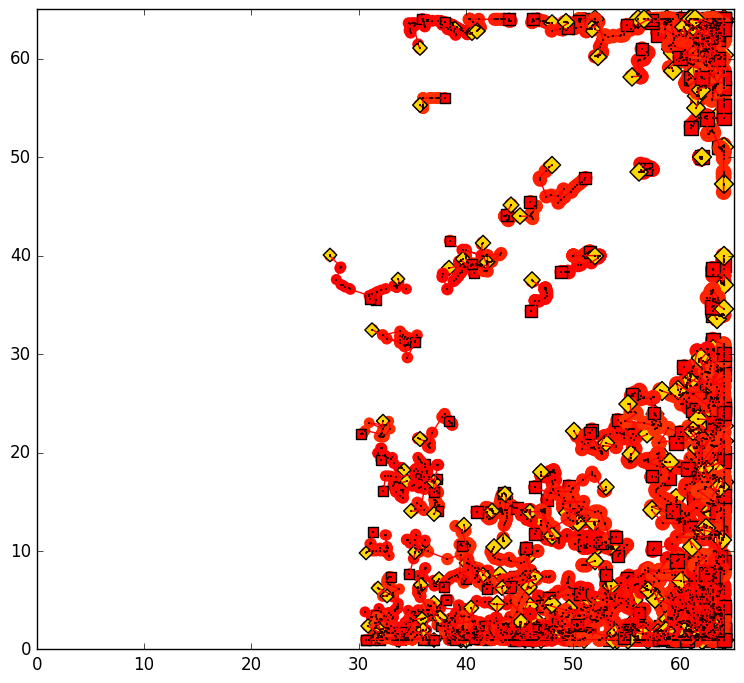

In [29]:
PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
tolerancia=30.0
minlong=15
#colores=Union{}

for p in CatenarioPositivo
    gordura=abs(p[:3])
    longus,gordus=size(p)
    if (mean(gordura)>tolerancia) && (longus>minlong)
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        colores=scatter(xxpos,yypos, s=gordura*2, edgecolors="none", 
        c=tiempos, cmap="autumn", vmin=0.0, vmax=0.72 )
        principios=scatter(xxpos[1],yypos[1], s=gordura*1.5,
        edgecolors="black", 
        color="r", marker="s", label="Inicio" )
        finales=scatter(xxpos[end],yypos[end], s=gordura*1.5, edgecolors="black", 
        color="gold", marker="D", label="Final" )
        # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#legend(loc="upper left")
#colorbar(colores, fraction=0.046)

#savefig("TrayectoriasPositivasPrincipioyFinal-01.svg", dpi=90)

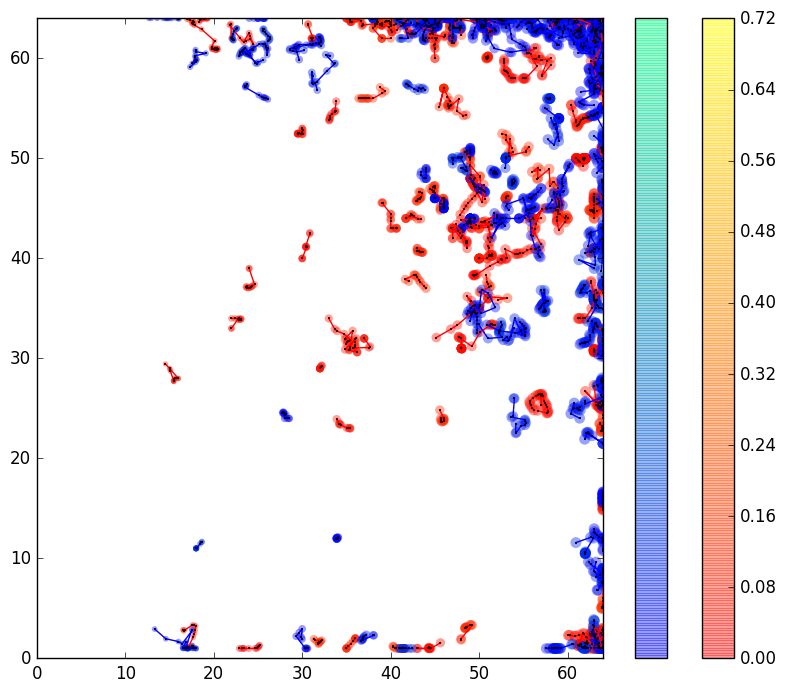

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd953a69f28>

In [24]:
figure(figsize=(9,8))
#axis("equal")
xlim(0,64)
ylim(0,64)
bolitasrojas=0
bolitasazules=0
tolerancia=15.0

for p in CatenarioPositivo
    gordura=abs(p[:3])
    if mean(gordura)>tolerancia
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        edgecolors="none", alpha=0.4, c=tiempos, cmap="autumn", vmin=0, vmax=0.72 )
       # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs(p[:3])
    if mean(gordura)>tolerancia
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        bolitasazules=scatter(xxpos,yypos, s=gordura,
        edgecolors="none", alpha=0.4, c=tiempos, cmap="winter",
        vmin=0,vmax=0.72)
        #annotate(round(tiempos[1]/7022,4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        #annotate(round(tiempos[end]/7022,4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

colorbar(bolitasrojas, fraction=0.046)
colorbar(bolitasazules, fraction=0.052, ticks=[])

#savefig("TrayectoriasLimpiasSinLabelColorMap-20-01.png", dpi=90)

In [27]:
ImagenCSD=readdlm("GarbageCollector/CentrosDeMasaParaPoster/CSDForLineArtAbove-550.dat")

64x64 Array{Float64,2}:
  0.2916     0.0844977  -0.854774   -1.31446   …   -0.902309    -2.16182  
  1.43307   -2.69369    -0.0379976   3.75366        2.85176      2.56818  
 -1.88755   -1.85613     0.595864    2.55025       -0.861886    -1.42793  
 -1.16521    1.68671    -1.86388    -6.40088        0.869733    -1.09075  
 -0.86338    1.05332    -1.00742    -4.93959        2.86288      1.46358  
 -1.91974    1.94103     5.98833     4.10417   …    1.99186     -0.640693 
 -0.38675    1.39403     4.15084     3.15178       -0.571383    -0.964214 
 -0.865326  -1.97822    -2.02102    -0.793189       3.20257     -0.946499 
 -2.3279    -2.61134    -2.92211    -1.54936        3.11489     -1.23592  
 -0.323395   0.886507    2.44805    -1.95883        2.25338      3.08929  
  2.75794   -0.0855337   3.43129    -1.85559   …   -0.00245144   1.20635  
  3.61541   -1.56362    -0.999216   -4.00033       -0.471795    -1.34111  
  2.12345   -0.629755   -0.337407   -2.6063         3.30154     -0.66304  
 

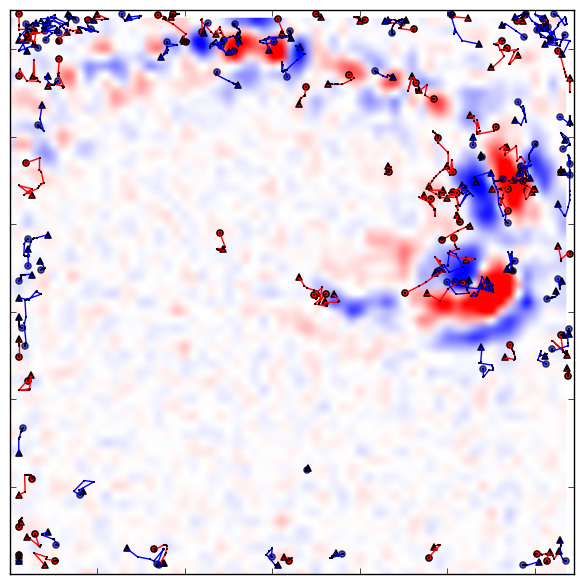

In [29]:
ion()

figure(figsize=(6,6))
#axis("equal")
tick_params(labelbottom="off", labelleft="off")
xlim(0,64.5)
ylim(0,64.5)
bolitasrojas=0
bolitasazules=0
tolerancia=15
marcagor=20
muevemin=0.001
tight_layout()

guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="spline16", origin="lower", vmin=-50, vmax=50)

for p in CatenarioPositivo
    gordura=abs(float32(p[:,3]))
    desviax=std(float32(p[:,1]))
    desviay=std(float32(p[:,2]))
    if mean(gordura)>tolerancia && (desviax>muevemin || desviay>muevemin) 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="red", marker="o" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,facecolor="red", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
       # annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs(float32(p[:,3]))
    desviax=std(float32(p[:,1]))
    desviay=std(float32(p[:,2]))
    if mean(gordura)>tolerancia && (desviax>muevemin || desviay > muevemin)
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", alpha=0.7, marker="o", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#colorbar(bolitasrojas, fraction=0.046)
#colorbar(bolitasazules, fraction=0.052, ticks=[])

savefig("TrayectoriasPhiladelfiaColorSpace-01.svg", dpi=90)

In [24]:
#una figura por cada trayectoria, si no, no vamos a ver ni maiz paloma
tolerancia=25.0
cuenta=0
ioff()

for p in CatenarioPositivo
    #Si no pasan de la tolerancia, no nos interesa
    gordura=abs(float64(p[:,3]))
    if mean(gordura)>tolerancia
    
        cuenta+=1
        figurin=figure(figsize=(6,6))
        axis("equal")
        xlim(0,64.5)
        ylim(0,64.5)
        bolitasrojas=None
        bolitasazules=None
    
        tight_layout()
    
 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=gordura*0.5, edgecolors="black", 
        color="red", marker="s", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=gordura*0.5, edgecolors="black", 
        color="gold", marker="D", label="Final" )
       # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")
        savefig("TrayectoriaFuente_$cuenta.svg", dpi=90)
        close()
   
    end
end



#=
for p in CatenarioNegativo
    gordura=abs(p[:3])
    if mean(gordura)>tolerancia &&des
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
         inicios=scatter(xxpos[1],yypos[1], s=gordura*0.5, edgecolors="black", 
        color="blue", alpha=0.7, marker="s", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=gordura*0.5, edgecolors="black", 
        color="green", marker="D", label="Final" )
        #annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        #annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end
=#
#colorbar(bolitasrojas, fraction=0.046)
#colorbar(bolitasazules, fraction=0.052, ticks=[])

#savefig("TrayectoriasInicioFinal-20-01.svg", dpi=90)

In [17]:
example=readdlm("CentrosMasa/TrayectoriaPositiva_107.dat")
xxpos=example[:,1]
yypos=example[:,2]
gordura=example[:,3]
etiquetas=example[:,4];

In [1]:
function quitalospromediosbajos(Datos::Array, tolerancia=1.0)
    #la masa es el tercer argumento
end

quitalospromediosbajos (generic function with 2 methods)

In [20]:
example[:2]

1.0